In [8]:
%load_ext ipython_unittest
%load_ext autoreload
%autoreload 2
import sys
import os
sys.path.append('..')
sys.stderr = open('/dev/null', 'w')
# os.getcwd(); os.listdir("..")

The ipython_unittest extension is already loaded. To reload it, use:
  %reload_ext ipython_unittest
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


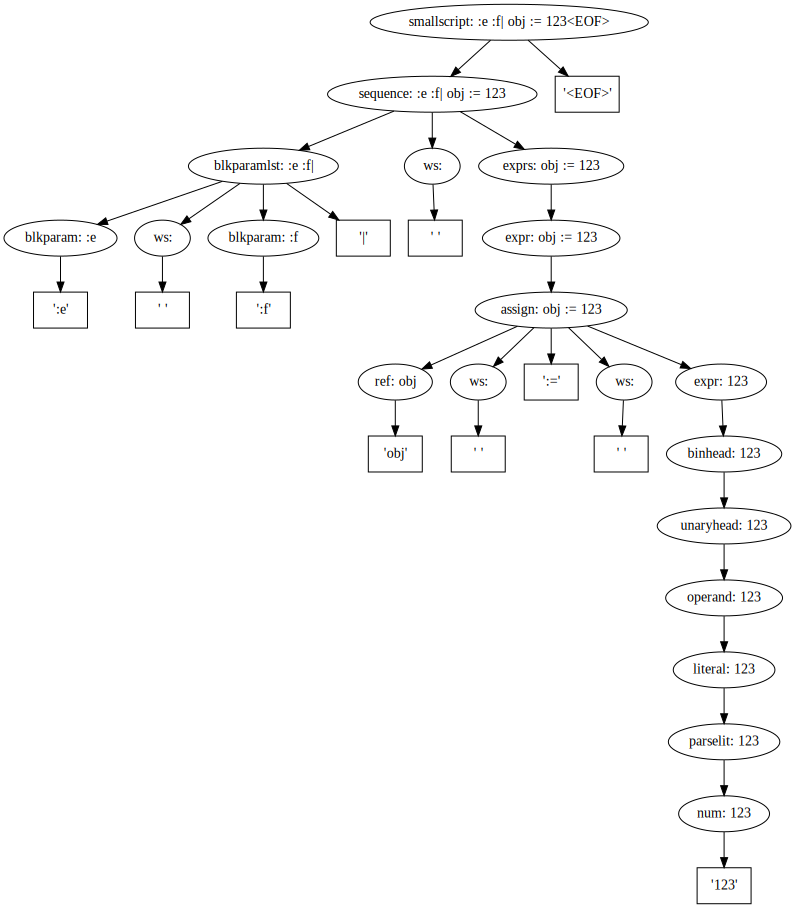

In [35]:
# st = """abc := -123 + 1.2 + 1.0e-1 + 16r123"""

#
# Tested
#

# assignment & ExpressionList
# st = "var1 := 1"
# st = "var1 := root"
# st = "var1 := 'abc'"
st = "var1 := root. var2 := var1" 
# st = "a := b := 2"
# st = "var1 := root. var2 := _"

# unarySend & unaryTail
#st = "obj1 attr3 name" 

# keywordSend
# st = "obj1 name: 'abc'"
# st = "obj1 method1__firstname: 'John' lastname: 'Doe'"
# st = "obj1 attr1: 123. obj1 attr1"

# binarySend
# st = "obj1 attr1: 1 + 2"
# st = "obj1 attr1: 1 + 2 + obj1 var1"
# st = "obj1 var1 + 1 + 2"
# st = "obj1 var1 + obj1 var2"
# st = "obj1 method3__var1: 3 + 4 var2: 2 + 3"

# cascade
# st = "7; + 3"
# st = "2; + 1; + 5" # Antlr ok, Amber fail
# st = "obj1 var1; +3"
# st = "obj1; method4 attr7 + 3" # Amber fail as it is mixed unaryMessage and binaryMessage
# st = "obj1; var1 + obj1 method4 attr7" # Amber fail as it is mixed unaryMessage and binaryMessage
# st = "obj1 var2: 7; var2; + 3" # ok
# st = "obj1; method4; method3__var1: 3 var2: 2; + obj1 var1; + 5" # ok

# subexpression
# st = "(obj1 method4 method3__var1: 3 var2: 2) + obj1 var1 + 5"
# st = "(obj := obj1) var1"
# st = """(obj1 m1: 1) + (obj2 m2 m3) + 2"""

# primitive
# st = f"<python: 'def hello:'>"

# BlockClosure
# st = "[ :e | | a | a:= e + 1]" # error
# st = "| tmp1 tmp2 | tmp1 := obj1 var1. tmp2 := tmp1 + 3. obj1 var2: tmp2 + 5. obj1 var2"
# st = "| tmp1 tmp2 | obj1 var1"
# st = "[2 + 3] value"
# st = "[ :e | 2 + e] value: 9"
# st = "b := [ :e | | a | a := e + 3]. b value: 9"
# st = 'b := [ :e | | a | a "comment" := [2 + 3] value + e]. b value: 9'

# literalArray
# st = 'obj1 := $F'
# st = "#('a' 12 $F true #root #(1 2) + root value: )"

st = "b := [ :e | 2 + e]. b value: 9"
st = 'b := [ :e | | a | a "comment" := [2 + 3] value + e]. b value: 9'
st = "| tmp1 tmp2 | obj1 var1"
# st = "[2 + 3] value"
# st = "#('a' 12 true #root #(1 2) + root value: )"
# st = "obj1 var1; + 3"
# st = "123 toString"
# st = "var1 := root"
# st = "obj1; method4 attr7 + 5"
# st = "obj1 var1; + 3"
# st = "7; + 3; +5"
# st = "7; + 3"
st = "[2 + 3] value"
st = "[:e | 2 + e] value: 13"
# st = "2 + 3. 4 + 5"
# st = "_ := b := 123"
# st = "[:e | 2 + 3 + e]"

st = "b := [:e | attr1 + e]. self attr2: b. self attr2"
# st = "[[2 + 3] value + [3 - 2] value]"
# st = "a.b := 'abc'"
st = ":e :f| obj := 123"

from smallscript.SObject import *
from smallscript.Closure import Script, Method

script = Script().compile(st)
script.dotGraph()

In [27]:
from antlr4 import InputStream, CommonTokenStream, ParseTreeWalker
InputStream('aa')


In [29]:
Script.__dict__

mappingproxy({'__module__': 'smallscript.Closure',
              'text': a Holder,String:Holder 1070,
              'parser': a Holder,Nil:Holder 10D0,
              'errorHandler': a Holder,Nil:Holder 1100,
              'smallscriptCxt': a Holder,Nil:Holder 1130,
              '__init__': <function smallscript.Closure.Script.__init__(self)>,
              'reset': <function smallscript.Closure.Script.reset(self)>,
              'compile': <function smallscript.Closure.Script.compile(self, text='')>,
              'firstStep': <function smallscript.Closure.Script.firstStep(self)>,
              'dotGraph': <function smallscript.Closure.Script.dotGraph(self)>,
              'run': <function smallscript.Closure.Script.run(self)>,
              'execute': <function smallscript.Closure.Script.execute(self, context)>,
              'errormsg': <function smallscript.Closure.Script.errormsg(self)>,
              'hasError': <function smallscript.Closure.Script.hasError(self)>,
              

In [16]:
from smallscript.SObject import *
from smallscript.Closure import Script, Method
from smallscript.Step import *

st = "obj := 123"
script = Script().compile(st)
ssStep = script.firstStep()
precompiled = ssStep.precompile()


TypeError: 'ScriptErrorListener' object is not iterable

In [21]:
Script().compile(st)

hello no error


TypeError: 'ScriptErrorListener' object is not iterable

In [18]:
from antlr4 import InputStream, CommonTokenStream, ParseTreeWalker
from antlr4.error.ErrorListener import ErrorListener
from antlr4.tree.Trees import Trees


In [19]:
InputStream('a := 123')

In [23]:
sys.path

['/usr/local/lib/python',
 '/Users/man/zdev/sprj/smallscript/nbs',
 '/Users/man/miniconda3/envs/rd_tf2/lib/python39.zip',
 '/Users/man/miniconda3/envs/rd_tf2/lib/python3.9',
 '/Users/man/miniconda3/envs/rd_tf2/lib/python3.9/lib-dynload',
 '',
 '/Users/man/miniconda3/envs/rd_tf2/lib/python3.9/site-packages',
 '..',
 '..']

In [24]:
os.getcwd(); os.listdir("..")

['LICENSE',
 'nbs',
 'tests',
 'README.md',
 'setup.py',
 '.gitignore',
 'smallscript',
 '.git',
 '.eggs',
 '.idea']